# Linear regression

## Prerequisites
- Basic Python
- Linear algebra

## Learning objectives
- Implement your first machine learning algorithm from scratch, in Python
- Understand the 4 parts of the general machine learning algorithm framework
    - Data
    - Models
    - Criteria
    - Optimisation
- Implement a random search algorithm as a trivial optimisation technique

## Intro - Classification vs regression

Most machine learning problems are one of two types: regression problems or classification problems.
As you can probably guess, classification problems are those where the output is categorical.
On the other hand, regression problems are those where the output that we want to predict is continuous.

For example, predicting house prices from features of houses is a regression problem because those prices can take any value. 
It could be a decimal. 
It could be \$10,320,302.50. 
It could be \$35. 
It could even be negative if someone wants to pay you to take it off their hands (in some cases this might not make sense, but the problem can still be framed as regression).

On the other hand, consider using a house's features to predict it's type, as one of detached, semi-detached or terraced. 
In this case, there are only a finite number of possible output values. As such, this is a classification problem.

## What's linear regression?

In this notebook, we will implement a **linear regression** algorithm.
This is the classic starting point for jumping into machine learning.

Linear regression predicts continuous outputs - hence the regression part of the name.
Linear regression makes predictions that are simply a weighted combination (a linear combination) of the inputs (plus some offset). 
That is a linear equation $y = mx + c$, hence the linear part of the name.

## The general framework for machine learning algorithms

Almost all machine learning algorithms consist of 4 components:

1. the data

2. the model

3. the criterion

4. the optimiser

This notebook will introduce you to all of those. 
By the end, we will have used all of them to implement our first machine learning algorithm - linear regression.

## 1. Data

The data represents the input-output relationship that our algorithm will learn.

Our aim is to produce a mathematical function that takes in an example and makes a prediction. 
The data will determine the meaning and shape of our function takes in, and what it outputs as a prediction.

Below is a picture of a CSV (comma separated value) file that contains some data about red wines.
Yes, red wines (just to highlight that the data can represent anything).

![](images/wine.png)

One application of this dataset, could be to use the information to predict the quality of the wine from the rest of it's features. 

### Firstly, how can we represent these examples numerically?

To start with, we need to separate the **label** (output) from the **features** (input). So for each example, we will have a single scalar label $y$.

In our case, each example has several features. We can group these together mathematically as a vector, $x$. It will have as many rows as there are features in the example. Let's call this number of features per example $n$. 

![](images/single_data_point.jpg)

We have $m$ examples, and indicate an arbitrary example's index with an $i$.

We can stack these examples in columns to produce a **design matrix**, $X$, which will then contain all of our data, as shown below.

![](images/design_matrix.jpg)

The scalar labels for each example can also be arranged into a single vector.

![image](images/labels.jpg)

Again, please note that this is just one specific example, and that other problems may have wildly different input output formats. 
The label could consist of many more values; it could even be something like an image. 
The same is true for the input. 
As long as it can be represented mathematically, it will be possible to create a model that processes examples of that type.

Can you think of any data type that might be hard to represent mathematically?

For the rest of this notebook, we will just use a **dummy** (fake/made up) dataset with a single feature for each example. 
This will make things easier to visualise and prevent some problems which we will address [later]("Multivariate Regression & Feature Normalisation.ipynb")

Now we know what our data should look like, let's get it in that format. Here, we'll just use a function that we've got in a utils (utilities) file (```utils.py```) to get some visualisable, dummy regression data.


In [1]:
import numpy as np
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt
from utils import get_regression_data
 
X, Y = get_regression_data()

Now that we have our data, $X$, represented in the form we want. Can we get any closer to predicting the label, $Y$?

# 2. The Model

## What does "model" mean?

Imagine having a complete and perfect simulation of the world. This would allow you to take whatever action you wanted and see the outcome. This would mean that it would allow you to simulate different trajectories of events. That is, it would allow us to model it. Using your experience of what trajectories led to what outcomes, you'd be able to make more and more accurate predictions. 
On a smaller scale than the whole world/universe, we can build models of specific things we care about, so that we can again query them to make predictions from.

## Our model

In this dataset, we can see something like a straight-line relationship between the acidity and the quality.
This indicates that the relationship may be well modelled by a linear equation, which is generally given in the form $y=wx + b$.

Linear regression uses such straight line equations to model the input-output relationship of the data.

In real problems of interest, this is rarely the case and we are likely to experience much more complex, nonlinear relationships between features and labels, as you can imagine.

In [2]:
class LinearHypothesis:
    def __init__(self): # initalize parameters 
        self.w = np.random.randn() ## randomly initialise weight
        self.b = np.random.randn() ## randomly initialise bias
        
    def __call__(self, X): # how do we calculate output from an input in our model?
        ypred = self.w * X + self.b ## make a prediction using a linear hypothesis
        return ypred # return prediction
    
    def update_params(self, new_w, new_b):
        self.w = new_w ## set this instance's weights to the new weight value passed to the function
        self.b = new_b ## do the same for the bias

In [3]:
H = LinearHypothesis() # instantiate our linear model
y_hat = H(X) # make prediction
print('Input:',X, '\n')
print('W:', H.w, 'B:', H.b, '\n')
print('Prediction:', y_hat, '\n')

Input: [[0.04398164]
 [0.044906  ]
 [0.07343624]
 [0.09881007]
 [0.21130876]
 [0.28814752]
 [0.33850317]
 [0.354109  ]
 [0.61682246]
 [0.68035214]
 [0.7544915 ]
 [0.77233339]
 [0.87055792]
 [0.95309655]
 [1.01598055]
 [1.41051746]
 [1.55869152]
 [1.56444688]
 [1.65534058]
 [1.76149771]] 

W: 0.4979354421076257 B: -0.47037637346442623 

Prediction: [[-0.44847636]
 [-0.44801609]
 [-0.43380987]
 [-0.42117534]
 [-0.36515825]
 [-0.32689751]
 [-0.30182365]
 [-0.29405295]
 [-0.16323861]
 [-0.13160493]
 [-0.09468831]
 [-0.0858042 ]
 [-0.03689473]
 [ 0.00420418]
 [ 0.03551635]
 [ 0.23197026]
 [ 0.30575138]
 [ 0.30861718]
 [ 0.35387637]
 [ 0.40673577]] 



In [4]:
def plot_h_vs_y(X, y_hat, Y):
    plt.figure()
    plt.scatter(X, Y, c='r', label='Label')
    plt.scatter(X, y_hat, c='b', label='Hypothesis', marker='x')
    plt.legend()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

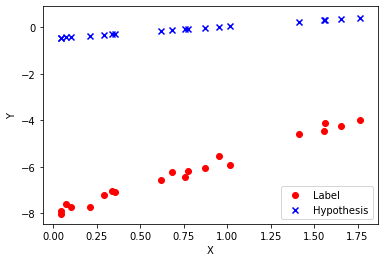

In [5]:
plot_h_vs_y(X, y_hat, Y)

As you can see, our model sucks to begin with.

## 3. The criterion - How do we know how good our model is?

Our **criterion** should be a measure of how bad our model is. We will use it to compare different models. As the model gets worse the loss function should return larger values.

Criterions need to return a **single number**, not a vector, not a matrix, or anything else.
This is because the whole point of it is to have a measure of how bad our model is.

This criterion is the thing which we will try to minimise.
Note that minimising the objective is equivalent to maximising the negative objective. 

<strong>Common synonyms</strong>
- Loss funtion = cost function = criterion = error function

### Mean squared error (MSE) loss

**One way** to evaluate the performance of a model that predicts continuous (not discrete or bounded) outputs is to use the mean squared error loss. This does exactly what you think: it calculates the error (difference between our model's prediction and the true label) and then squares it and takes the mean of those square errors for each example. Squaring any value makes it positive, so as long as the error is not zero it will increase the value of the loss - regardless of whether our prediction is below (negative error) or above (positive error) the value of the label, the values of that **squared** difference will increase the returned loss.

There are many other criterions that are useful for different tasks (e.g. the binary cross entropy (BCE) loss for classification, which we will cover later).

Let's write a function to calculate the cost using the mean squared error loss function. It should take in an array of predictions for different example inputs as well as an array of corresponding example labels. It should return a single number (scalar) that represents the MSE loss. 

![title](images/NN1_cost_function.JPG)

In [6]:
def L(y_hat, labels): # define our criterion (loss function)
    errors = y_hat - labels ## calculate errors
    squared_errors = errors ** 2 ## square errors
    mean_squared_error = sum(squared_errors) / len(squared_errors) ## calculate mean 
    return mean_squared_error # return loss

In [7]:
cost = L(y_hat, Y)
print(cost)

[38.70895434]


## The analytical solution to minimising mean square error

Given the data, model and criterion that we have used above, we can now express the objective that we wish to minimise mathematically. 

![](images/mse_vector.jpg)

Note: this equation does not explicitly mention the bias. How can it be applied to our problem in the same form? What would we need to change about our input example vectors and weight matrix? 

We can now simply find the minimum point on this curve by finding an expression for it's derivative and setting this to zero.

![](images/analytical_linear_reg.jpg)

Now let's implement this analytical solution for least squares regression in code.



In [8]:
print(X.shape)
X_ = np.hstack((np.ones((X.shape[0], 1)),X)) # what's happening here? hint: where did the bias go?
print(X_.shape)
print(X_.round(2))

optimal_w = np.matmul(np.linalg.inv(np.matmul(X_.T, X_)), np.matmul(X_.T, Y)) ## evaluate the analytical solution

print(optimal_w)
print(optimal_w.shape)

(20, 1)
(20, 2)
[[1.   0.04]
 [1.   0.04]
 [1.   0.07]
 [1.   0.1 ]
 [1.   0.21]
 [1.   0.29]
 [1.   0.34]
 [1.   0.35]
 [1.   0.62]
 [1.   0.68]
 [1.   0.75]
 [1.   0.77]
 [1.   0.87]
 [1.   0.95]
 [1.   1.02]
 [1.   1.41]
 [1.   1.56]
 [1.   1.56]
 [1.   1.66]
 [1.   1.76]]
[[-7.96095365]
 [ 2.29694415]]
(2, 1)


In case you didn't notice, this analytical solution has no mention of the model bias. 
In fact, we incorporate the model bias into our weights matrix by adding an extra element in a new column.
This bias is then multiplied my a corresponding new features in each example, which has the value 1 for each example.

# bias in weight matrix diagram

Doing this makes the analytical solution much clearer and means we have to solve it only for one value $W$, rather than also for $b$.

In practice, we treat them as separate variables.
Our computer doesn't care for mathematical conveniences

### Drawbacks of computing the analytical solution

This solution involves inverting a matrix of size $R^{n \times n}$. 
Here $n$ is the number of features that each example has. In our example $n=1$, so computing the analytical solution is feasible. 
However, as we will soon see, most problems of practical interest contain examples with many more features. 
For example, 1080p images have more than 1,000,000 features each. 
The time complexity of inverting a matrix of size $n \times n$ is around $O(n^3)$. 
This means that computing the analytical solution for these kinds of real world problems is often computationally expensive, to the extent that it can become computationally infeasible.

Analytical solutions however, are not the only approach that we can take. 
We can alternatively use one of many numerical optimisation techniques.
These numerical optimisation techniques can be applied where analytical techniques are not feasible, and as such will be used throughout the course from here onward.

## 4. The optimiser

The optimiser adjusts the model such that it's performance improves with respect to the criterion. Most machine learning models are **parametric**, which means that the function which they represent depends on their parameters (in our case the weight (slope) and bias (intercept)). Different optimisers improve our models using different algorithms.

In this notebook we will implement a trivial optimisation technique called **random search**.

### Random Search
Random seach is the process of randomly choosing values within a specified range and testing them to evaluate how good they are. E.g. test random values between 0 and 10.

![](images/NN1_randomsearch.JPG)

Let's implement a function that tries a bunch of possible values for the weight and bias of our model.

In [9]:
def random_search(n_samples, limit=20):
    """Try out n_samples of random parameter pairs and return the best ones"""
    best_weights = None ## no best weight found yet
    best_bias = None ## no best bias found yet
    lowest_cost = float('inf') ## initialize it very high (how high can it be?)
    for i in range(0, n_samples): ## try this many different parameterisations
        w = np.random.uniform(-limit, limit) ## randomly sample a weight within the limits of the search
        b = np.random.uniform(-limit, limit) ## randomly sample a bias within the limits of the search
        # print(w, b)
        H.update_params(w, b) ## update our model with these random parameters
        y_hat = H(X) ## make prediction
        cost = L(y_hat, Y) ## calculate loss
        if cost < lowest_cost: ## if this is the best parameterisation so far
            lowest_cost = cost ## update the lowest running cost to the cost for this parameterisation
            best_weights = w ## get best weights so far from the model
            best_bias = b ## get best bias so far from the model
    print('Lowest cost of', lowest_cost, 'achieved with weight of', best_weights, 'and bias of', best_bias)
    return best_weights, best_bias ## return the best weight and best bias

Lowest cost of [0.08257131] achieved with weight of 2.555757093759361 and bias of -8.350007022588738


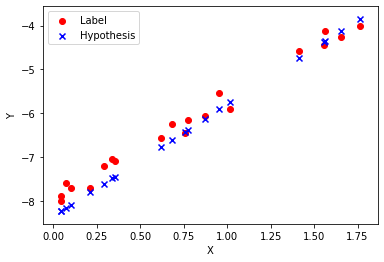

In [10]:
best_weights, best_bias = random_search(10000) # do 10000 samples in a random search 
H.update_params(best_weights, best_bias) # make sure to set our model's weights to the best values we found
plot_h_vs_y(X, H(X), Y) # plot model predictions agains labels

### What happened?

Our random search optimisation was able to fit the input-output relationship of our data! Or at least it got close. 

#### What would happen if our true parameter values were outside of the range [-20, 20]? 

The model performance wouldn't improve much!

This is because of the limits of the values of the parameters that we perform the grid search over. In this case, by default we are only trying parameters in the range from -20 to 20. But if the true bias were to be, say 30, which is outside of this range - then the model would never sample a value close to this. 

So here we've assumed the range of values that our optimal parameterisation might be included in. Feel free to change this limit in the function definition to see the how the model performance changes.

### What are the limitations of random search?

#### Non-heuristic search
Random search keeps searching even if it finds the optimal value (they can't be sure it's the best parameterisation in the domain that they're checking until they've compared it to every other test parameterisation.
It has no way of figuring out whether the next parameters that it is going to test are in the right direction towards their optimal values.
That is, the search does not follow a heuristic - an indication of how to do better.

#### The Curse of Dimensionality
Aside from the issues showcased above, the major limitation of random search is how it scales with the number of parameters in our model. 

To model more complex functions we'll need more complex models - models with more parameters. 

But the time taken for random search scales **exponentially** with the number of parameters. This is because it has to search the whole parameter space, which has as many dimensions as the number of parameters.

Imagine our parameters can only take the integer values $0$ or $1$.

If we have one parameter, the entire parameter space is ${0, 1}$.
That is, we have to check the criterion of $2$ possible parameterisations.

If we have one parameter, the entire parameter space is ${(0, 0), (0, 1), (1, 0), (1, 1)}$.
That is, we have to check the criterion of $4 \ (=2^2)$ possible parameterisations.

If we have one parameter, the entire parameter space is ${(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)}$.
That is, we have to check the criterion of $8 \ (2^3)$ possible parameterisations.

As you should be able to tell from the patter, the number of parameterisations that are possible is given by $n^d$.
This is in the case where parameters can take only integer values, which massively simplifies the problem, and is optimistic because most models parameters can take continuous values.

This is a manifestation of something known as the **curse of dimensionality**.

## sklearn example


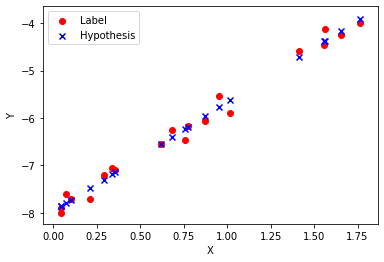

In [12]:
from sklearn.linear_model import LinearRegression

linear_regression_model = LinearRegression()
linear_regression_model.fit(X, Y)
y_hat = linear_regression_model.predict(X)
plot_h_vs_y(X, y_hat, Y)

## Summary

- the very basic recipe for making machine learning algorithms consists of:
    1. The data - our examples of inputs and outputs (in the supervised case) which determine the function that our model will learn to represent and hence the problem that we are solving
    2. The model - our mathematical function that we pass our data forward through to make a prediction for the output
    3. The criterion - how we measure how bad our model is.
    4. The optimiser - our method for updating the parameters of our models.
- random search is a trivial optimisation strategy and will struggle to search over high dimensional spaces
- the MSE loss is appropriate for this regression problem

## Next steps
- [Gradient based optimisation]() - in this notebook we will look at optimisation techniques that do scale to 
more complex models and problems. Can we use gradient based optimisation to find the best parameters for our model and establish whether this wine is drinkable?

## Challenges

1. Implement grid Search

Grid search is the process of trying out values at common intervals within a specified range for each parameter, and testing them to evaluate how good they are. E.g. test the values [0, 1, 2, 3, 4, 5]. It is the same as random search, other than the fact that the test coordinates are chosen systematically rather than randomly. 
